question : Implement Principal Component Analysis (PCA) in Python on the Iris dataset to reduce the data to two principal components and visualize the transformed dataset using a scatter plot. 

#### Theory : Principal Component Analysis (PCA)
- PCA is a Dimensionality Reduction technique.
- It projects data into a new coordinate system where: 
    1. 1st Principal Component (PC1) = direction of maximum variance.
    2. 2nd Principal Component (PC2) = direction orthogonal to PC1 with next highest variance.
- Why PCA?
    1. Reduces dimensionality → less complexity.
    2. Helps visualize high-dimensional data.
    3. Removes noise, highlights important patterns.
- iss iris dataset m 4 features : sepal length , speal width , petal length , petal width....isse reduce krnge 2D (PC1 & PC2) and fir plot krnge scatterplot...

In [9]:
# Step 1: Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [10]:
# Step 2 : Load the dataset
iris = load_iris()
 
X = iris.data #yeh features 4D
y = iris.target # target (species: 0-setosa, 1-versicolor, 2-virginica)

print("Shape of X before PCA:", X.shape)

Shape of X before PCA: (150, 4)


In [11]:
# Step 3 : Standardise the data 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Standardization (Scaler):
#PCA is affected by scale → features like sepal length (5–7 cm) vs petal width (0.1–2.5 cm) have different ranges. StandardScaler makes them mean=0, std=1.

In [12]:
# Step 4 : Applying PCA ..2 components lenge

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Shape after PCA:", X_pca.shape)

#PCA (n_components=2):
#	•	Finds top 2 directions with maximum variance.
#	•	Projects 4D data → 2D.

Shape after PCA: (150, 2)


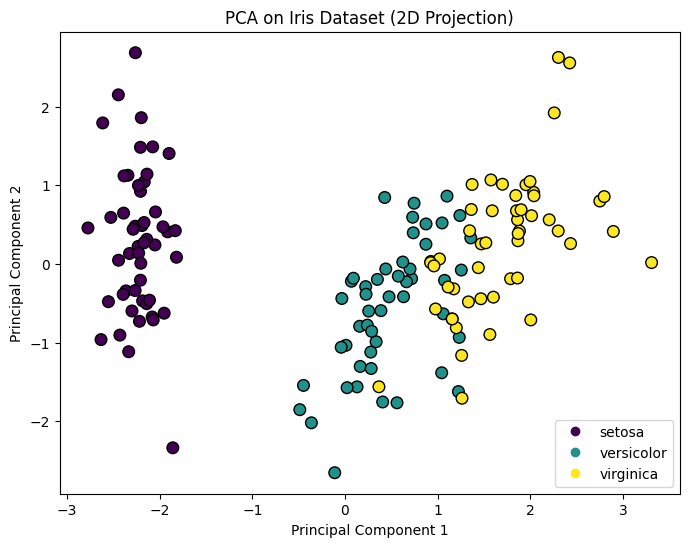

In [16]:
# Step 5: Visualization
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', edgecolor='k', s=70)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA on Iris Dataset (2D Projection)")
plt.legend(handles=scatter.legend_elements()[0], labels=list(iris.target_names))
plt.show()

# Scatter plot shows species separation in PC1 vs PC2 space.
# Setosa separates clearly, while Versicolor & Virginica overlap.


Now Manual PCA code : 
Steps : 
1. Standardize the dataset : 
- PCA is scale-sensitive, so we make mean=0, variance=1.
- X_scaled = (X - mean) / variance

2. Compute the Covariance Matrix : 
- Covariance tells how features vary together.
- If we have standardized data X_scaled with shape (n_samples, n_features):
- C = (1/(n-1)) * X_Transposed_of_scaled * X_scaled

3. Eigen Decomposition : 
-  Find eigenvalues (λ) and eigenvectors (v) of the covariance matrix.
- Eigenvalues = importance (variance explained) of each principal component.
- Eigenvectors = directions (new feature axes).
- C_v = Lambda_v

4. Sort Eigenvalues & select top k
- Sort eigenvalues in descending order.
- Pick the top k eigenvectors → these form the projection matrix W.
Here k=2 (for 2D visualization).

5.  Project Data onto New Axes
- Multiply the standardized data with the top eigenvectors:
- X_pca = X_scaled * W
- This gives transformed data in 2D.